In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


EXPLORATORY DATA ANALYSIS

In [2]:
data_filepath="../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv"
data=pd.read_csv(data_filepath)
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
#checking missing value
data.isnull().any()
#output shows we have zero missing values

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [4]:
#check data types
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
include =['object', 'float', 'int']
  
data.describe(include = include)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


**Testing Job Satisfaction**

In [6]:
data['JobSatisfaction'].value_counts()
#we see that 459 employees report a high rate of job satisfaction, while 289 report a low rate of job satisfaction

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [7]:
data.loc[data['JobSatisfaction']<=1,'LowJobSatisfaction'] = 'True'
#printing out the new column
print(data['LowJobSatisfaction'])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
1465     NaN
1466    True
1467     NaN
1468     NaN
1469     NaN
Name: LowJobSatisfaction, Length: 1470, dtype: object


From the crosstab below we can see a correlation between cases with a Low Job Satsifaction and monthly attrition

In [8]:
pd.crosstab(index=data['Attrition'], columns=data['LowJobSatisfaction'])

LowJobSatisfaction,True
Attrition,
No,223
Yes,66


We can plot this in a bar graph for easier visualization

<AxesSubplot:xlabel='Attrition'>

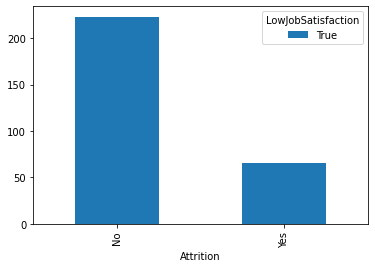

In [13]:
data_tab = pd.crosstab(index=data['Attrition'],columns = data['LowJobSatisfaction'])
data_tab.plot.bar()

#In the output we can see that low job satisfaction led to a number of employees leaving

Testing Job Satisfaction against other columns

In [14]:
jb =data.groupby('JobSatisfaction')
jb.mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
JobSatisfaction,,,,,,,,,,,,,,,,,,,,,
1,36.916955,782.505190,9.190311,2.944637,1.0,1057.885813,2.743945,68.636678,2.761246,2.055363,...,2.730104,80.0,0.788927,11.608997,2.816609,2.771626,6.989619,4.276817,2.314879,4.384083
2,36.985714,771.675000,9.103571,2.896429,1.0,1054.414286,2.764286,66.632143,2.728571,2.075000,...,2.735714,80.0,0.800000,11.360714,2.839286,2.767857,7.107143,4.135714,2.200000,4.075000
3,37.022624,835.500000,9.418552,2.914027,1.0,1024.705882,2.651584,64.882353,2.726244,2.074661,...,2.696833,80.0,0.762443,11.106335,2.742081,2.782805,7.004525,4.285068,2.138009,4.033937
4,36.795207,802.069717,9.030501,2.901961,1.0,986.202614,2.749455,64.681917,2.714597,2.052288,...,2.701525,80.0,0.823529,11.189542,2.819172,2.729847,6.962963,4.202614,2.148148,4.074074


Employees with high jb have a higher average daily rate,higher average stock option level and less working hours on average
These employees also have a higher job involvement

COMPARISON WITH OTHER FACTORS
Show a breakdown of distance from home by job role and attrition.

In [21]:
data_distance_dept = data[["Attrition", "Department","DistanceFromHome"]]
data_distance_dept

,Attrition,Department,DistanceFromHome
0,Yes,Sales,1
1,No,Research & Development,8
2,Yes,Research & Development,2
3,No,Research & Development,3
4,No,Research & Development,2
...,...,...,...
1465,No,Research & Development,23
1466,No,Research & Development,6
1467,No,Research & Development,4
1468,No,Sales,2


In [23]:

#2. Compare average monthly income by education and attrition

data_education_income =data[["Attrition", "EducationField","MonthlyIncome"]]
data_education_income

,Attrition,EducationField,MonthlyIncome
0,Yes,Life Sciences,5993
1,No,Life Sciences,5130
2,Yes,Other,2090
3,No,Life Sciences,2909
4,No,Medical,3468
...,...,...,...
1465,No,Medical,2571
1466,No,Medical,9991
1467,No,Life Sciences,6142
1468,No,Medical,5390


In [26]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [29]:
data.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

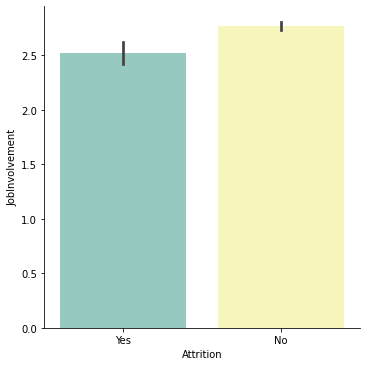

In [44]:
attrition_distance = sns.catplot(x="Attrition", y="JobInvolvement", data=data, kind="bar",palette="Set3")

The output shows that employees with lower job involvement had a higher rate of attrition

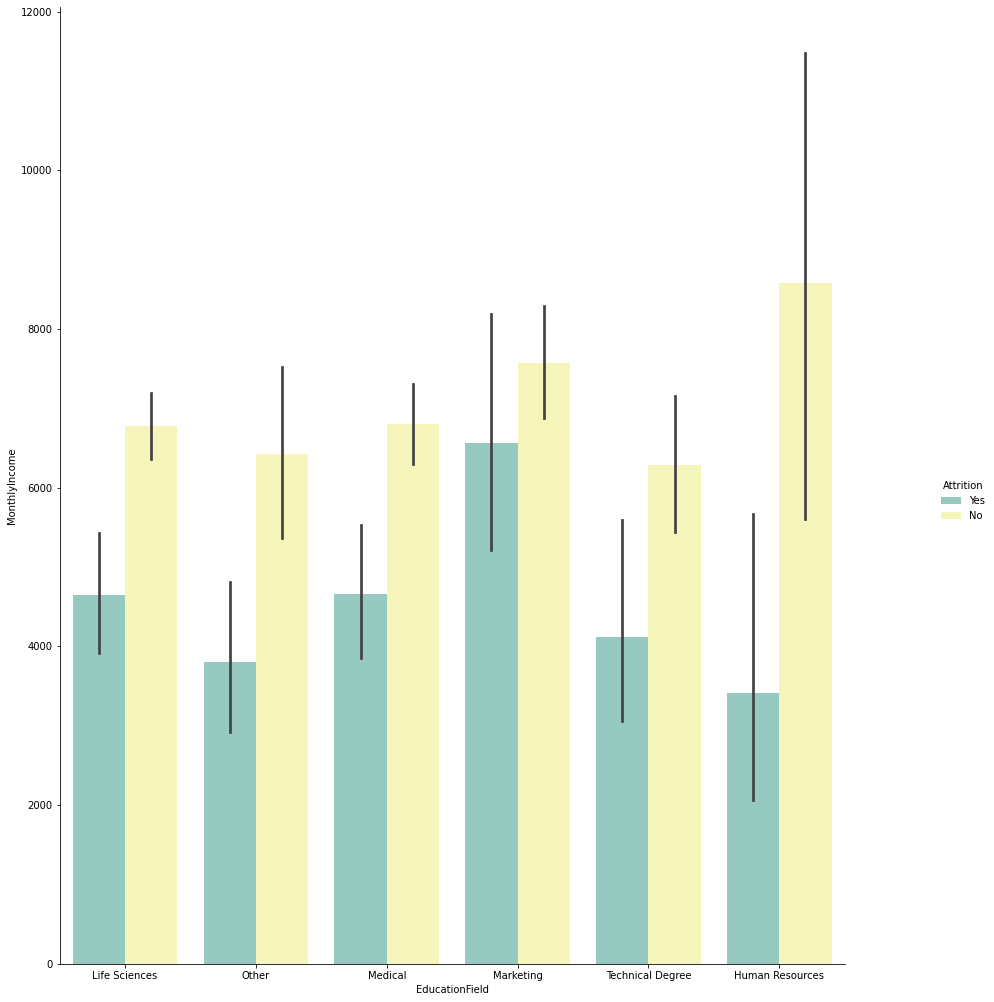

In [48]:
g = sns.catplot(x="EducationField", y="MonthlyIncome", hue="Attrition", data=data, kind="bar",palette="Set3")
g.fig.set_size_inches(15,15)

The marketing field had the highest rate of attrition